In [31]:
# Importing the required libraries, pandas, pyplot, numpy, seaborn, preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [4]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Reading the csv file and putting it into 'df' object.
df =pd.read_csv('adult_dataset-1.csv') 


In [6]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### **`Data Dict:`**
1. **age**:`Age of an individual`
2. **workclass**:`Individual work category`
3. **fnlwgt**:`final weight`
4. **education**:`the highest level of education achieved by an individual`
5. **education.num**:	`The highest level of education achieved in numerical form`
6. **marital.status**: `marital status of an individual`	
7. **occupation**: `the general type of occupation of an individual.`	
8. **relationship**: `represents what this individual is relative to others.`	
9. **race**:`Descriptions of an individual’s race.`
10. **sex**:`the biological sex of the individual.`	
11. **capital.gain**:`capital gains for an individual`
12. **capital.loss**	: `capital loss for an individual`
13. **hours.per.week**:	`the hours an individual has reported to work per week`
14. **native.country**:	`country of origin for an individual`
15. **income**:`whether or not an individual makes more than $50,000 annually <=50k, >50k`

In [7]:
# Let's understand the data, how it look like.(Only first 5 rows)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


As observed the columns workclass and occupation consist of missing values which are represented as '?' in the  dataframe.

Moreover, when workclass is having a missing value, occupation is also missing in that row. Let's check how may rows are missing.

In [33]:
# rows with missing values represented as'?'.
df_1 = df[df['workclass']=='?']


#print missing rows
df_1


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Now we can check the number of rows in df_1.

In [9]:
# Print df_1 varaible information
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


There are 1836 rows with missing values, which is about 5% of the total data. 
Drop these rows, since dropping just 5% data won't make any harm.

In [34]:
# dropping the rows having missing values in workclass
df =df[df['workclass']!='?']


#Print first 5 rows of dataframe after dropping
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Let's see whether any other columns contain a "?". Since "?" is a string,  apply this check only on the categorical columns.

In [35]:
df_2=df.select_dtypes(include=['object'])
df_2.apply(lambda x: x=='?').sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

Thus, the columns occupation and native.country contain some "?"s. Let's get rid of them.

In [36]:
# dropping the "?"s
df=df[df['occupation']!='?']
df=df[df['native.country']!='?']



In [13]:
# clean dataframe details
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **`Data Preparation`**

✔️Both categorical and numeric features as predictors.<br>
✔️Encode categorical variables using Label Encoder


In [37]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])


#print first 5 rows of categorical columns
df_categorical.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


##### apply Label encoder to df_categorical


In [38]:
# Initialise LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Apply encoding on df_categorical
df_categorical = df_categorical.apply(le.fit_transform)



#print df_categorical first 5 rows
df_categorical.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


#### concat df_categorical with original df


In [39]:
# drop all categorical columns from df 

df = df.drop(df_categorical.columns,axis=1)

#concat df_categorical to df
df = pd.concat([df,df_categorical],axis=1) 


#Print last 5 rows of df
df.tail()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
32556,22,310152,10,0,0,40,2,15,4,10,1,4,1,38,0
32557,27,257302,12,0,0,38,2,7,2,12,5,4,0,38,0
32558,40,154374,9,0,0,40,2,11,2,6,0,4,1,38,1
32559,58,151910,9,0,0,40,2,11,6,0,4,4,0,38,0
32560,22,201490,9,0,0,20,2,11,4,0,3,4,1,38,0


In [17]:
# look at column types in df
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [40]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category') 


Now all the categorical variables are suitably encoded.

<hr>

## **`Model Building and Evaluation`**




✔️Building  decision tree with default hyperparameters. <br>
✔️Use cross-validation to tune them.

In [41]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split



In [42]:
# Putting feature variable to X
X =df.drop('income',axis=1)

# Putting response variable to y
y = df['income']


In [43]:
# Splitting the data into train and test with test size as 30%, and random state as 99|
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,stratify=y,random_state=99)


#Print x_train last 5 rows
X_train.tail()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1282,41,48087,4,0,1590,40,2,5,0,2,1,4,1,38
14405,40,75363,10,0,0,40,2,15,5,3,4,4,0,38
28946,53,181677,10,0,0,40,0,15,0,5,1,4,1,38
4052,25,139012,13,2174,0,40,2,9,4,11,3,1,1,39
30172,32,48520,10,0,0,40,2,15,2,2,0,4,1,38


In [44]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier



# Initialise decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)


# fitting descision tree on train & test data
dt_default.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=5)

### Checking the evaluation metrics of our default model



In [45]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


# Making predictions
y_pred_default = dt_default.predict(X_test)


# Printing classification report
print(classification_report(y_test,y_pred_default))


              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6797
           1       0.79      0.54      0.64      2252

    accuracy                           0.85      9049
   macro avg       0.83      0.75      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [46]:
# Printing confusion matrix 
print(confusion_matrix(y_test,y_pred_default))


# Printing accuracy
print(accuracy_score(y_test,y_pred_default))


[[6479  318]
 [1041 1211]]
0.8498176594098795


#### Plotting Confusion matrix using plot_confusion_matrix function: 


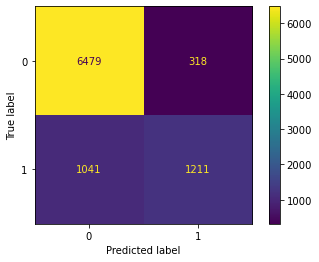

In [52]:
# import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix


#plot confusion matrix
plot_confusion_matrix(dt_default,X_test,y_test)
  

### Plotting the Decision Tree




In [47]:
# Importing required packages(tree from sklearn) for visualization
from sklearn import tree


# Putting all feature names in a list
features = list(df.columns)


#Putting all classes in list i.e >=50 and <=50
cls= ['>=50','<=50']


In [54]:
#Printing features names

print(features)

print("-----------------------------")
#Printing classes names
print(cls)


['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
-----------------------------
['>=50', '<=50']


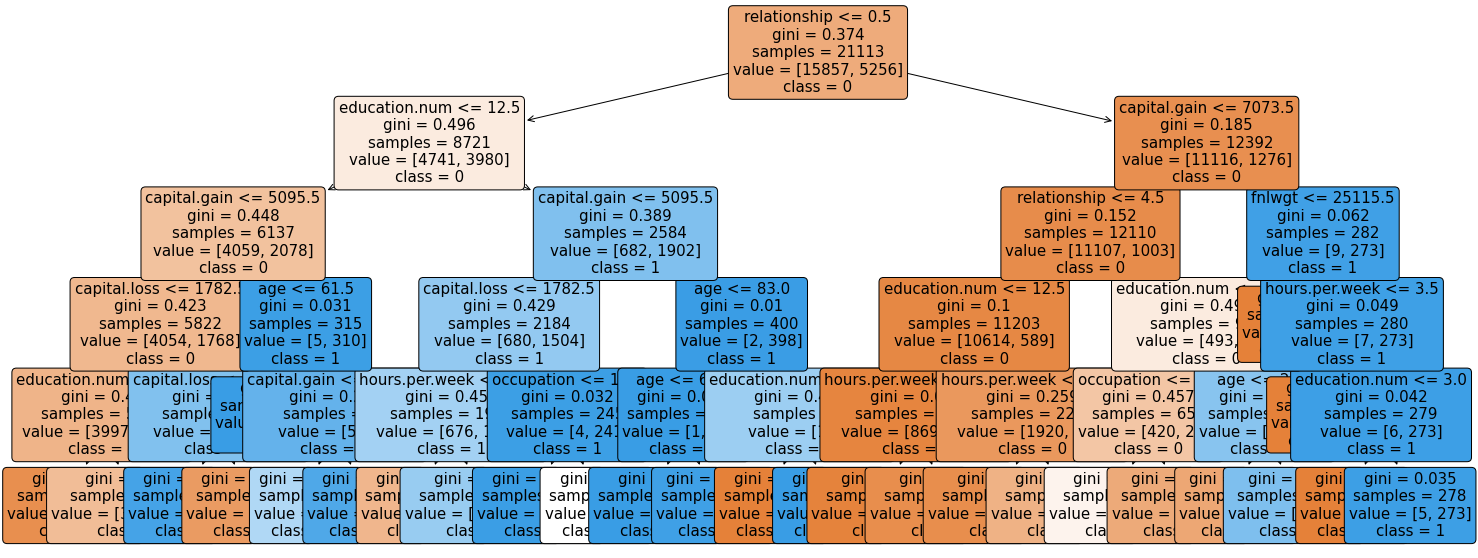

In [81]:
#Plotting our decision tree for max_depth=3

plt.figure(figsize=(25,10))

plt.tight_layout()
a = tree.plot_tree( dt_default,
    max_depth=5,
    feature_names=features,
    class_names=['0','1'],
    filled=True, rounded=True, fontsize=15)




In [55]:
# Print textual representation of a tree 
text_representation = tree.export_text(dt_default)

# print text_representation
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |--- feature_2 <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  7.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  1782.50
|   |   |   |   |--- feature_4 <= 1989.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  1989.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 61.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  61.50
|   |   |   |   |--- feature_3 <= 7032.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  7032.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |--- feature_5 <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  31.00
|   |   |   |   |   |--- class: 1
|   

Hyperparameter Tuning



✔️The default tree is quite complex.<br>
✔️Need to simplify it by tuning the hyperparameters.<b> 



### Tuning max_depth

✔️Find the optimum values for max_depth. <br>
✔️Check how the value of max_depth affects the decision tree.

Creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)
    
#### GridSearchCV to find optimal max_depth




In [48]:
# Import Kfold and GridSearchCV

from sklearn.model_selection import GridSearchCV,KFold



# specify number of folds for k-fold CV (we are taking 5)
n_folds = 5

# parameters to build the model on ( As of now just max_depth from range 1 to 40)
parameters ={'max_depth':range(1,40)} 


# instantiate the model (DecisionTreeClassifier) with criteria gini and random_state as 100
dtree = DecisionTreeClassifier(criterion='gini',random_state=100)


# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree,parameters,scoring='accuracy',cv=n_folds,return_train_score=True)



#fit the tree on training data
tree.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [49]:

# scores of GridSearch CV
scores = tree.cv_results_


#Check the scores in a dataframe  (here just printing first 5 rows)
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024534,0.004940,0.003993,0.003953,1,{'max_depth': 1},0.751125,0.751125,0.750888,0.751066,...,0.751054,0.000087,39,0.751036,0.751036,0.751095,0.751051,0.751051,0.751054,0.000022
1,0.034560,0.006447,0.006577,0.008067,2,{'max_depth': 2},0.824532,0.813640,0.832110,0.812885,...,0.821342,0.007236,17,0.820545,0.823268,0.818650,0.823456,0.820792,0.821342,0.001809
2,0.043745,0.009445,0.006059,0.006335,3,{'max_depth': 3},0.837793,0.829031,0.844423,0.830175,...,0.835741,0.005621,12,0.835406,0.837537,0.833748,0.837191,0.835534,0.835883,0.001368
3,0.056814,0.010511,0.006681,0.006361,4,{'max_depth': 4},0.844897,0.837793,0.847028,0.836570,...,0.842372,0.004311,8,0.846122,0.850740,0.838780,0.842342,0.845894,0.844776,0.004013
4,0.069041,0.006296,0.006894,0.007305,5,{'max_depth': 5},0.850580,0.840635,0.848212,0.838702,...,0.845072,0.004585,4,0.850444,0.852990,0.843221,0.845480,0.850394,0.848506,0.003592


Now let's visualize how train and test score changes with max_depth.

Text(0, 0.5, 'Accuracy')

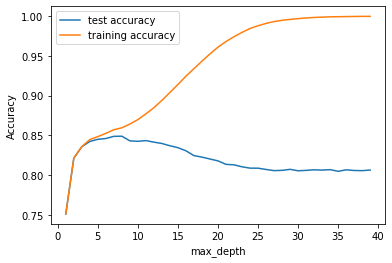

In [58]:

# plotting accuracies with max_depth vs mean train and test scores
plt.figure()
plt.plot(scores['param_max_depth'],scores['mean_test_score'],label='test accuracy')
plt.plot(scores['param_max_depth'],scores['mean_train_score'],label='training accuracy')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')







As we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. ( Scores are average accuracies across the 5-folds.) 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [50]:
# GridSearchCV to find optimal max_depth


# specify number of folds for k-fold CV (here 5)
n_folds = 5


# parameters to build the model on( just min_samples_leaf with range 5 to 200 and with step of 20)
parameters ={'min_samples_leaf':range(5,200,20)} 


# instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)



# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)



#fitting the above tree on training data

tree.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [51]:
# scores of GridSearch CV
scores = tree.cv_results_

# convert scores into dataframe
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.164822,0.009311,0.003311,0.006137,5,{'min_samples_leaf': 5},0.819323,0.816008,0.818849,0.819043,...,0.818879,0.001658,10,0.914032,0.915335,0.913381,0.914451,0.913090,0.914058,0.000798
1,0.130423,0.021313,0.011247,0.005852,25,{'min_samples_leaf': 25},0.853185,0.844423,0.845844,0.839886,...,0.846303,0.004377,4,0.869153,0.869686,0.867140,0.868628,0.869279,0.868778,0.000886
2,0.120220,0.018974,0.007424,0.006547,45,{'min_samples_leaf': 45},0.851527,0.841819,0.848449,0.835149,...,0.845450,0.006145,7,0.862226,0.862759,0.860332,0.861761,0.862294,0.861874,0.000834
3,0.119333,0.007721,0.005504,0.005884,65,{'min_samples_leaf': 65},0.850580,0.839924,0.853659,0.841307,...,0.847914,0.006096,3,0.859917,0.859917,0.857667,0.860162,0.858031,0.859139,0.001063
4,0.110820,0.021290,0.002357,0.002937,85,{'min_samples_leaf': 85},0.856737,0.840398,0.852238,0.840123,...,0.848245,0.006749,2,0.856128,0.858319,0.856128,0.857735,0.855781,0.856818,0.001012


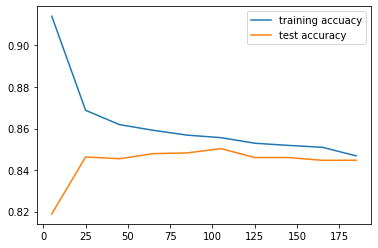

In [52]:
# plotting accuracies with min_samples_leaf vs mean train and test accuracy
plt.figure()
plt.plot(scores['param_min_samples_leaf'],scores['mean_train_score'],label='training accuacy')
plt.plot(scores['param_min_samples_leaf'],scores['mean_test_score'],label='test accuracy')
plt.legend()







 At low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

## **`Grid Search to Find Optimal Hyperparameters`**




Using GridSearchCV to find multiple optimal hyperparameters together. 

In [53]:
# Create the parameter grid ( we already defined for you)
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# no. of folds(5)
n_folds = 5

# Instantiate the grid search model with default parameters value
dtree=DecisionTreeClassifier(random_state=42)


# instantiate GridSearchCV with above 3 parameters and verbose as 1
grid_search = GridSearchCV(dtree,param_grid,cv=n_folds,verbose=1)



# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [54]:
# cv results
cv_results = grid_search.cv_results_

# print cv results
pd.DataFrame(cv_results).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080322,0.007048,0.007241,0.007115,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845371,0.835662,0.845844,0.838228,0.841071,0.841235,0.003962,15
1,0.077407,0.005173,0.006784,0.007903,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845371,0.835662,0.845844,0.838228,0.841071,0.841235,0.003962,15
2,0.078931,0.009534,0.004933,0.006637,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845371,0.835662,0.848212,0.838228,0.841071,0.841709,0.004578,13
3,0.074497,0.011402,0.007500,0.007346,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845371,0.835662,0.848212,0.838228,0.841071,0.841709,0.004578,13
4,0.115454,0.021984,0.007520,0.007335,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.848923,0.843713,0.844423,0.838465,0.847466,0.844598,0.003615,7


In [55]:
# printing the optimal accuracy score 
print(grid_search.best_score_)


#Printing best hyperparameters parameters & its values
print(grid_search.best_params_)




0.8479607567366141
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


**Running the model with best parameters obtained from grid search.**

In [56]:
# model with optimal hyperparameters also add random state as 100
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=10,min_samples_leaf=100,min_samples_split=50) 



# fitting above model with training data/

clf_gini.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [57]:
# accuracy score
clf_gini.score(X_test,y_test)




0.8497071499613217

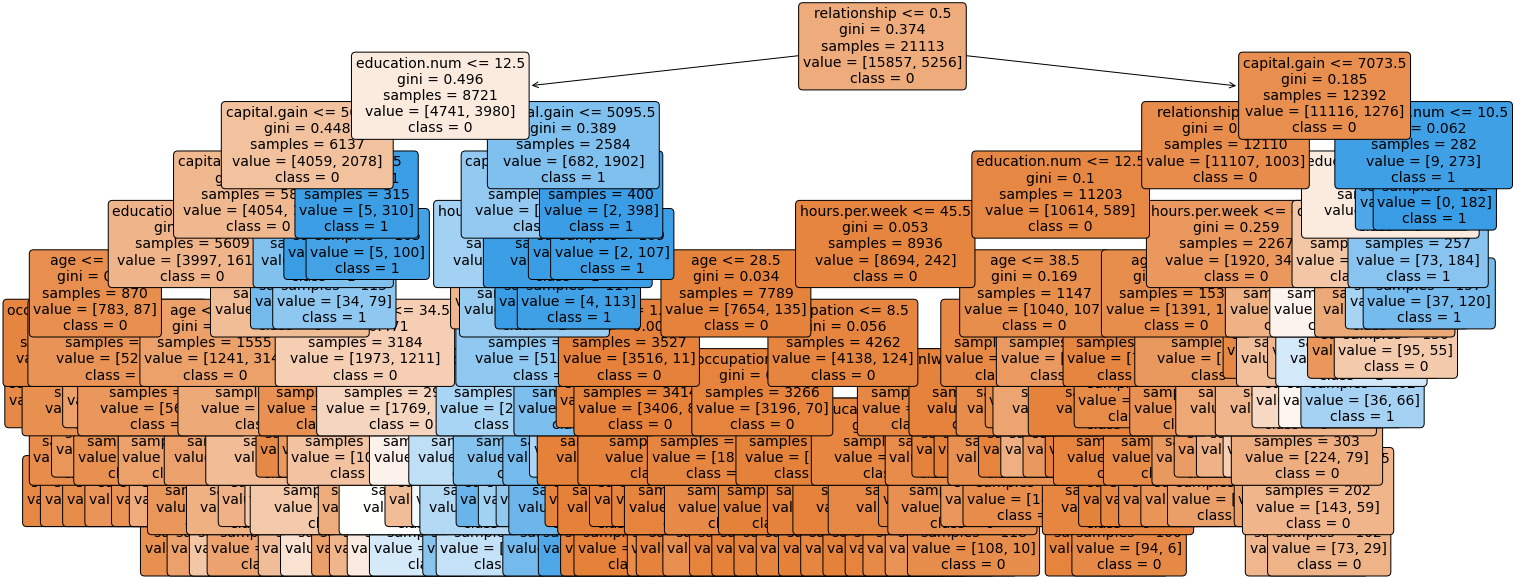

In [58]:
# Importing tree for visualization
from sklearn import tree



# plotting the tree
plt.figure(figsize=(25,10))

plt.tight_layout()
a = tree.plot_tree(clf_gini,
    feature_names=features,
    class_names=['0','1'],
    label='all',
    filled=True,rounded=True,fontsize=14)





The above tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [59]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion='gini',
    random_state=100,
    max_depth=3,
    min_samples_split=50,
    min_samples_leaf=50)





# fitting the model with training data
clf_gini.fit(X_train,y_train)




# Print model score
clf_gini.score(X_test,y_test)




0.8361144877887059

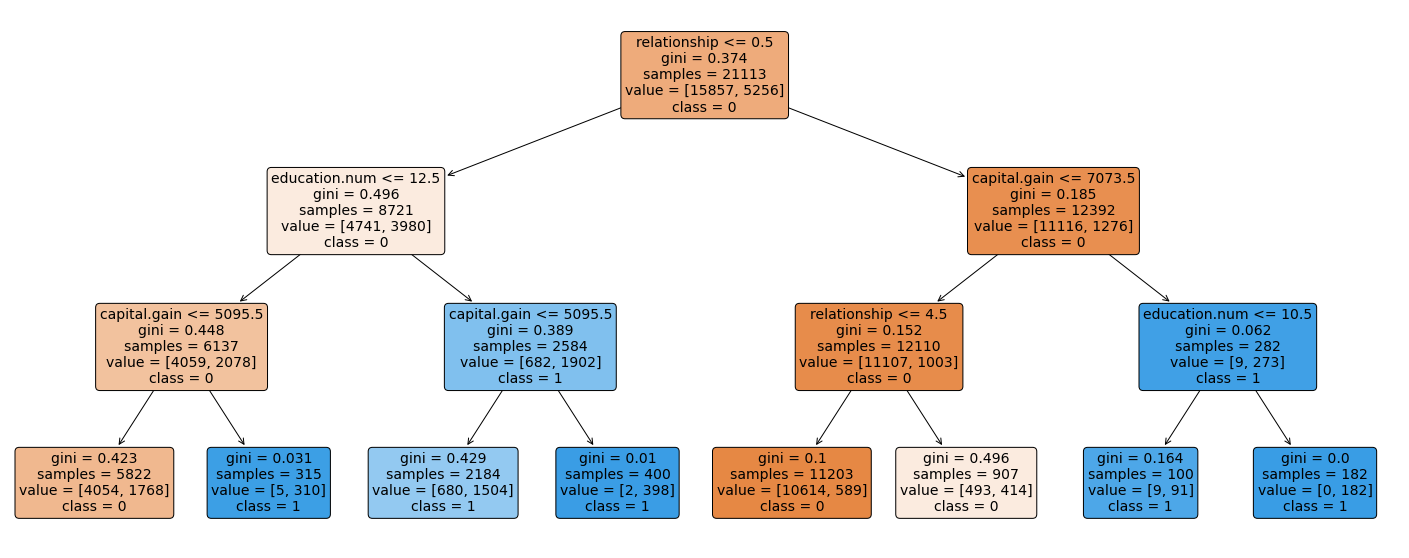

In [60]:
# plotting tree with max_depth=3

plt.figure(figsize=(25,10))

plt.tight_layout()
a =tree.plot_tree(clf_gini,
    max_depth=3,
    feature_names=features,
    class_names=['0','1'],
    filled=True,rounded=True, fontsize=14) 






In [61]:
# Import classification_report and confusion_matrix



# Predict on test data
y_pred =clf_gini.predict(X_test) 


# print matrix of classification_report
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6797
           1       0.77      0.48      0.59      2252

    accuracy                           0.84      9049
   macro avg       0.81      0.72      0.75      9049
weighted avg       0.83      0.84      0.82      9049



[[6482  315]
 [1168 1084]]


C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


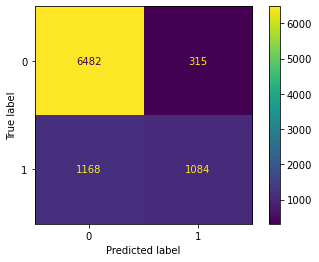

In [62]:
# Print confusion matrix
print(confusion_matrix(y_test,y_pred))


from sklearn.metrics import plot_confusion_matrix
#plot confusion matrix
plot_confusion_matrix(clf_gini,X_test,y_test)




✔️The above model is not much better than the default model. <br>
✔️Now tree is not much complex to understand.

## **`Pruning in Descision tree`**


 lets apply Pruning on our last build model.


In [63]:
#Initialise cost_complexity_pruning_path with training data
path = clf_gini.cost_complexity_pruning_path(X_train,y_train)


#Checing out ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas,path.impurities



In [73]:
#Printing all alphas
print(ccp_alphas)


[0.00000000e+00 4.95207652e-05 3.00573710e-03 1.29649450e-02
 1.31069227e-02 2.04585360e-02 2.72121449e-02 6.05579189e-02]


Set these values of alpha and pass it to the ccp_alpha parameter of  DecisionTreeClassifier. By looping over the alphas array,  find the accuracy on both Train and Test parts of dataset.

In [64]:
# Initialise empty arrays for train and test accuracy
Accuracy_Train, Accuracy_Test = [],[]


#Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:
    
    #Instantiate DecisionTreeClassifier with random_state=0 and ccp_alpha as ccp_alpha iterated value
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    
    #Fitting model on training data
    
    clf.fit(X_train,y_train)
    
    #Predicting on train data
    Train_pred=clf.predict(X_train)
    
    
    #predicting on test data
    Test_pred=clf.predict(X_test)
    
    
    #Appending training accuracy 
    Accuracy_Train.append(accuracy_score(y_train,Train_pred))
   
    
    #Appending test accuracy 
    Accuracy_Test.append(accuracy_score(y_test,Test_pred))
    
    


Text(0.5, 1.0, 'Accuracy vs alpha for training and testing sets')

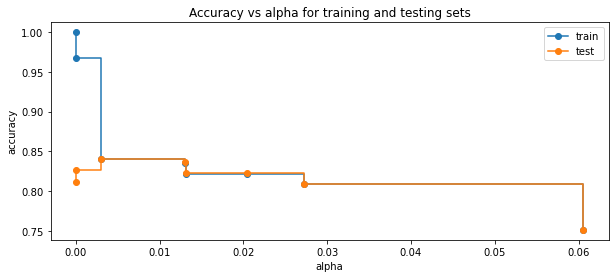

In [65]:
train_scores = Accuracy_Train
test_scores =Accuracy_Test

plt.figure(figsize=(10,4))

# plot the below figure
#fig, ax = plt.subplots()
plt.plot(ccp_alphas,train_scores,label='train',marker='o',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,label='test',marker='o',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs alpha for training and testing sets')




From the above plot, it can be observed that between first and second alpha values, we get the maximum test accuracy. Although  train accuracy has decreased to 0.8,  model is now more generalized and it will perform better on unseen data.


So now  add ccp_alpha as  as another hyperparameter along with grid searched parameters in  deciscion tree




In [66]:
#Set '0.01'  as ccp_alpha value in our final deciscion tree



# Instantiate DecisionTreeClassifier
final_dt=DecisionTreeClassifier(ccp_alpha=0.01,random_state=100,max_depth=3,min_samples_leaf=50,min_samples_split=50)


#Fitting model on training data

final_dt.fit(X_train,y_train)
    
#Predicting on train data
Train_pred=final_dt.predict(X_train)


#predicting on test data
Test_pred=final_dt.predict(X_test)


# Print final test and train accuracy
print(accuracy_score(y_train,Train_pred))
print(accuracy_score(y_test,Test_pred))




0.8357883768294416
0.8361144877887059


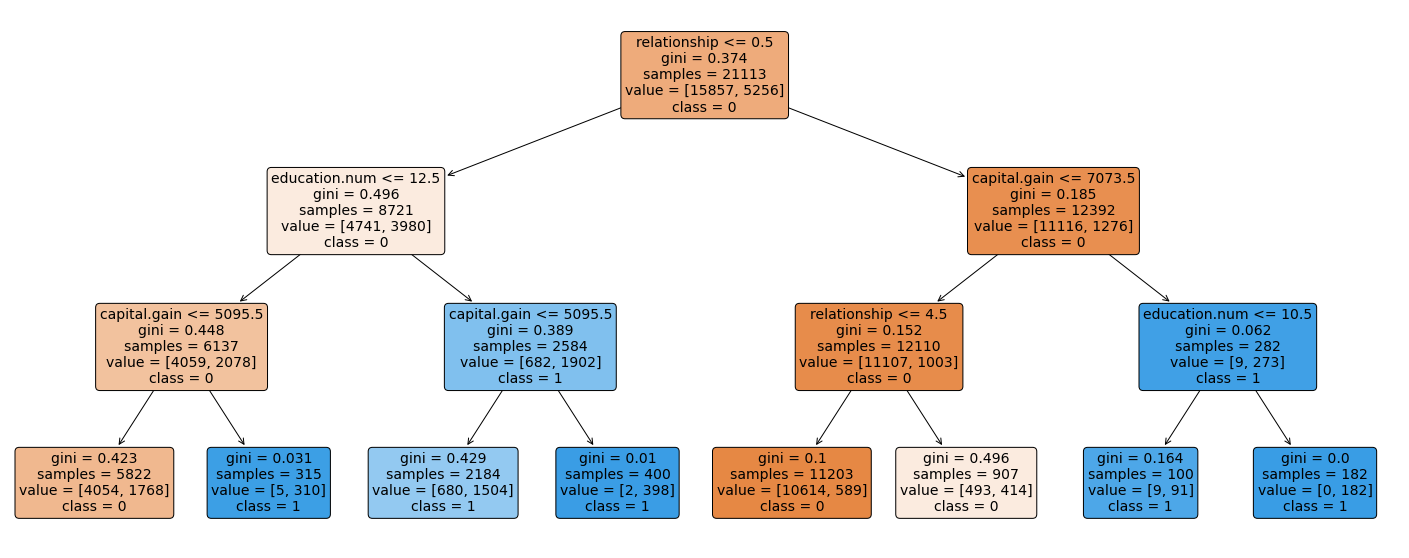

In [68]:
# plotting tree.  

plt.figure(figsize=(25,10))

plt.tight_layout()
a = tree.plot_tree( clf_gini,
    feature_names=features,
    class_names=['0','1'],
    filled=True,rounded=True,fontsize=14)
